## HOG implementation with python and numpy

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

PI = 3.1415926

class HOG:
    def __init__(self, img):
        self.img = img
        
    def shifted_x(self, step=1):
        '''
        Reture shifted image to compute graident in x direction
        '''
        img_padded = np.pad(self.img, ((0, 0), (0, step)), 'constant', constant_values=0)
        return img_padded[:, 1:] 

    def shifted_y(self, step=1):
        '''
        Reture shifted image to compute graident in y direction
        '''
        img_padded = np.pad(self.img, ((0, step), (0, 0)), 'constant', constant_values=0)
        return img_padded[1:, :]
    
    def mag(self, gx, gy):
        '''
        Compute the magnitude of the gradients
        
        '''
        return np.sqrt(np.power(gx, 2) + np.power(gy, 2))
    
    def theta(self, gx, gy, eps=1e-6):
        '''
        Compute the angle of the gradients
        eps: prevent dividing by 0
        
        '''
        return np.arctan(gy/(gx+eps)) 
    
    def forward(self, interval_size=9, show_grad=True):
        '''
        Arguements:
        -interval_size: how many gridients interval are desired. 
            e.g. if 9, all direction will be divided into 2*9 = 18 directions. 
                 with a resolution of 360/2*9 = 20 degree
        -show_grad: if true, plot the gradients in x and y directions
        
        '''
        interval = int(360 / (interval_size * 2))
        self.historgram_x = np.arange(-180, 180, interval)
        
        #compute gradients in x and y directions
        xgrad = self.img - self.shifted_x() 
        ygrad = self.img - self.shifted_y()
        
        if show_grad:
            plt.imshow(xgrad)
            plt.title('gradients in the X direction')
            plt.colorbar()
            plt.show()
            plt.imshow(ygrad)
            plt.title('gradients in the Y direction')
            plt.colorbar()
            plt.show()
            
        #compute the magnitude and angle for each gradient components
        self.g_theta = self.theta(xgrad, ygrad).flatten() * 180/PI #change rad to degree
        self.g_mag = self.mag(xgrad, ygrad).flatten() 
        
    def plot_hog(self, normalization=True):
        '''
        Plot the Histogram of graidents.
        Arguments:
        -normalization: if true, normalize the area under histogram to 1
        '''
        plt.hist(self.g_theta, 
                 bins=self.historgram_x, 
                 weights=self.g_mag, 
                 density=normalization)
        plt.title('Histrogram of Graidents')
        plt.xlabel('Directions from -180 to 180')
        plt.ylabel('Frequency')
        plt.show()
    

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


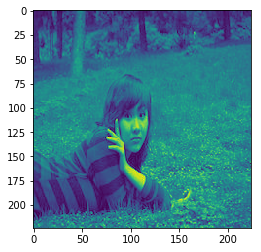

In [2]:
from scipy import misc

img = misc.imread('demo.jpg')
img = img.mean(axis=2) #use grayscale image
plt.imshow(img)
plt.show()


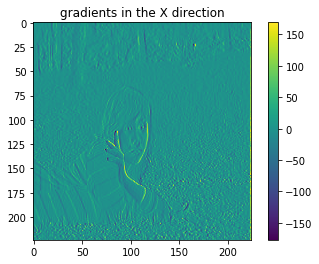

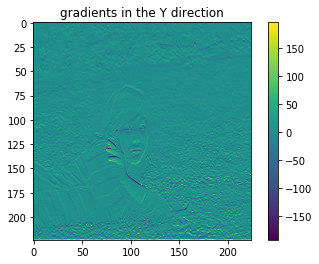

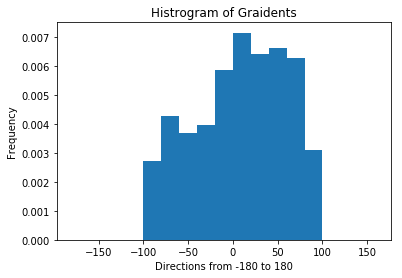

In [3]:
hog = HOG(img)
hog.forward()
hog.plot_hog()